In [2]:
import src.DataCollection as Data
import numpy as np
import matplotlib.pyplot as plt
import src.Plot as Plot
import src.Calculate as Calc

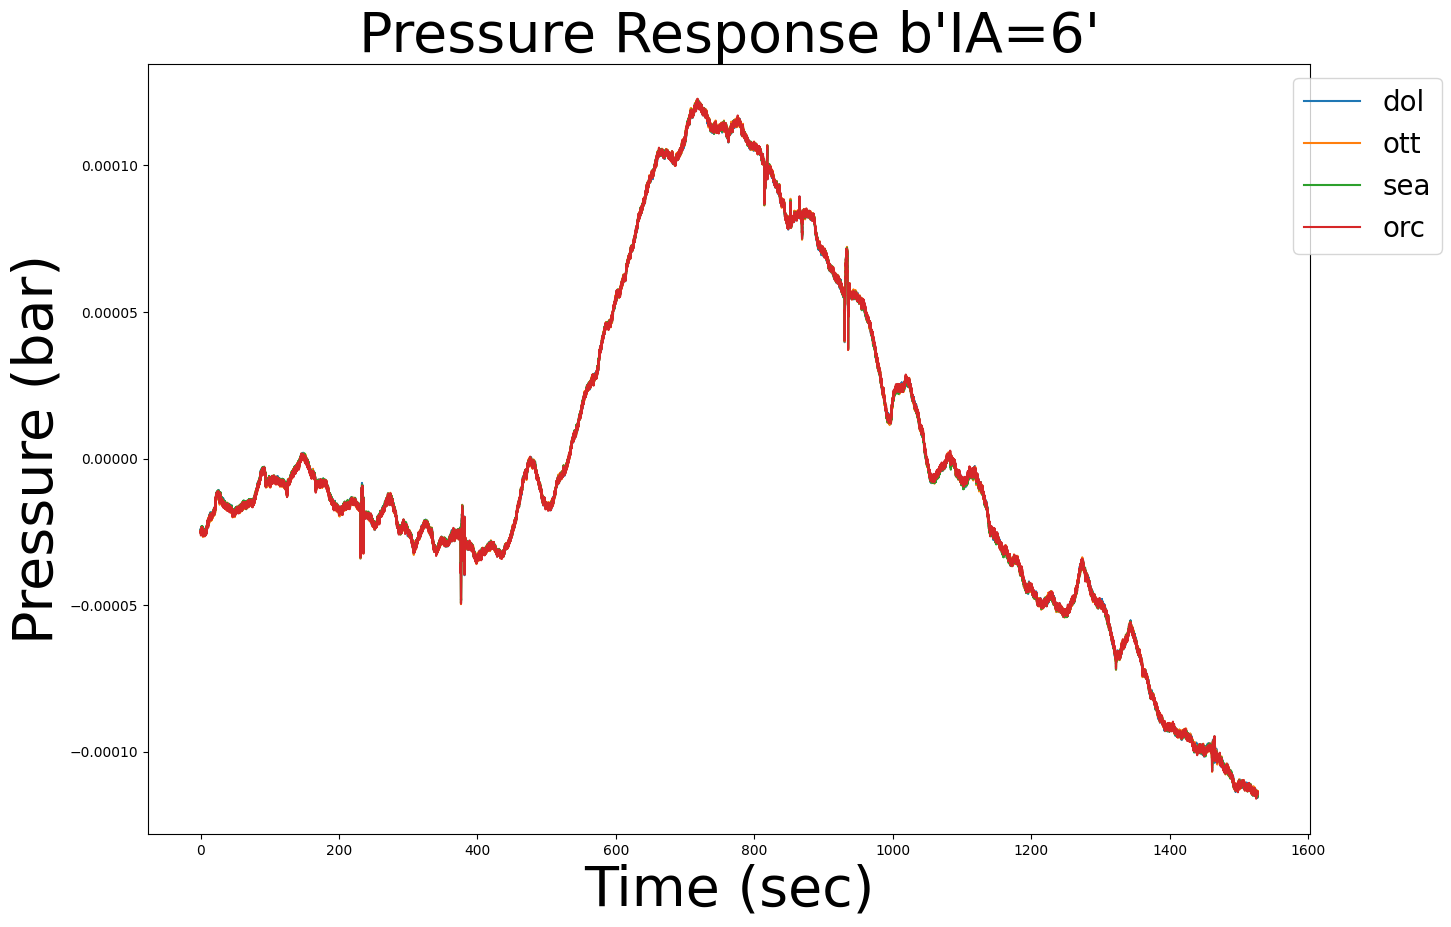

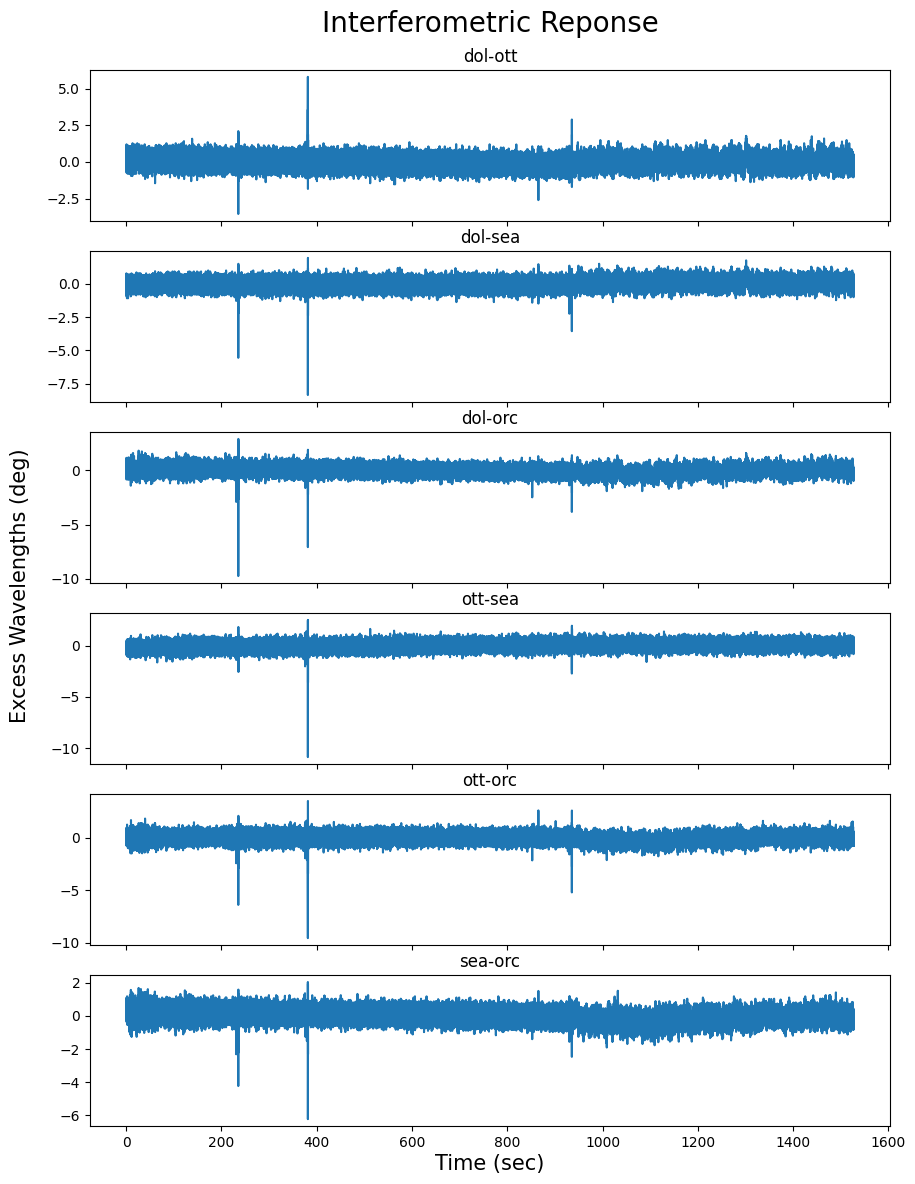

In [4]:
path = '/Users/namsonnguyen/OneDrive/Pressures/filter5/Field_Experiments/'
path = '/Users/namsonnguyen/OneDrive/Pressures/filter6/Lab_Experiments/'
file = 'jul25_field_boom.pkl'
file = 'synced_jul19_lab'
barometer_response = Data.reformat_pressure_dict(path, file + '.pkl')
Plot.time_series(barometer_response)

excess_lengths = Calc.excess_path_length(barometer_response)
Plot.interferometric_response(excess_lengths)

/Users/namsonnguyen/repo/MET4A_infrasonics/src/Plot.py:97: RuntimeWarning: divide by zero encountered in power
  ax[i][j].plot(time_axis, time_axis**-2.0, label='delta_time**-2.0')
/Users/namsonnguyen/repo/MET4A_infrasonics/src/Plot.py:98: RuntimeWarning: divide by zero encountered in reciprocal
  ax[i][j].plot(time_axis, time_axis**-1.0, label='delta_time**-1.0')
/Users/namsonnguyen/repo/MET4A_infrasonics/src/Plot.py:99: RuntimeWarning: divide by zero encountered in power
  ax[i][j].plot(time_axis, time_axis**-0.5, label='delta_time**-0.5')


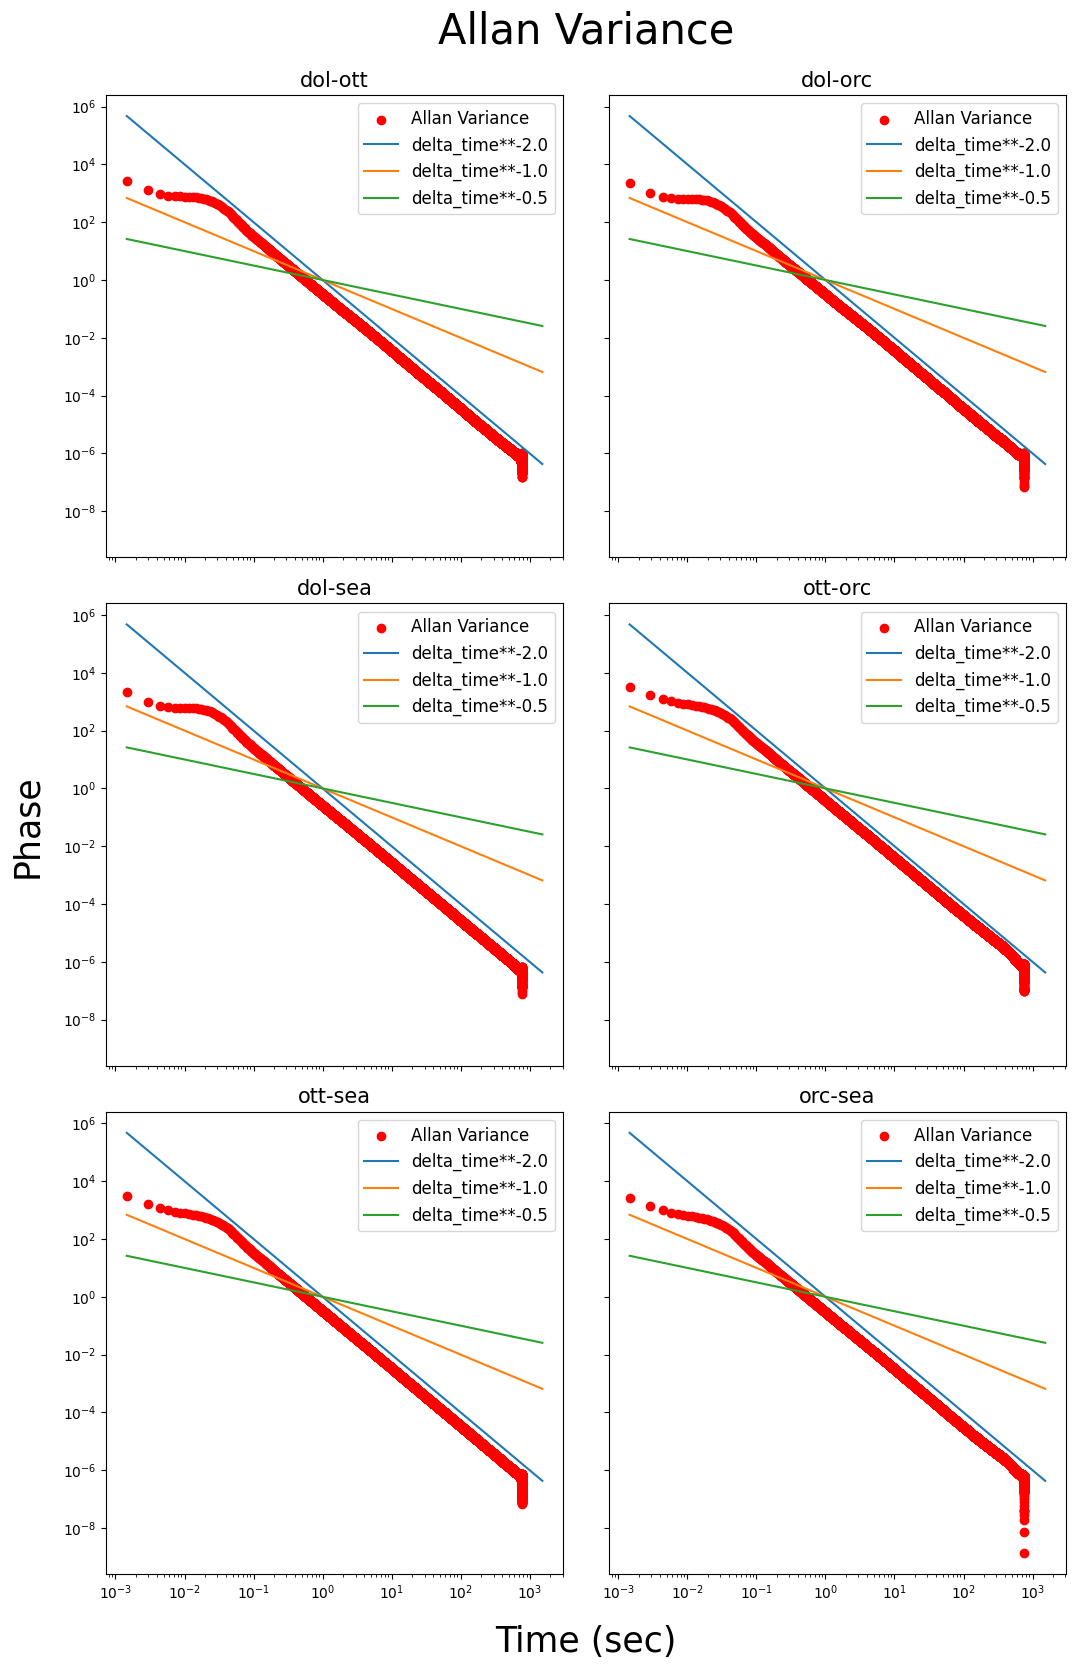

In [5]:
path = '/Users/namsonnguyen/repo/met4a/data/Synced_allan_var/'
file_name = '%s_allan_var.pkl' % file
unformatted_allan_var = Data.load(path + file_name)

unformatted_allan_var.keys()

# Add function to reformat Allan variance pkl files
formatted_allan_var = {}
formatted_allan_var['allan_var'] = unformatted_allan_var
formatted_allan_var['times'] = excess_lengths['times']
formatted_allan_var['specifications'] = excess_lengths['specifications']
formatted_allan_var['specifications']['units'] = {'allan_var':'Phase',
                                                'times':excess_lengths['specifications']['units']['times'],
                                                'delta_time':0.001457255920325755}

formatted_allan_var['specifications']['stations']

Plot.allan_variance(formatted_allan_var)

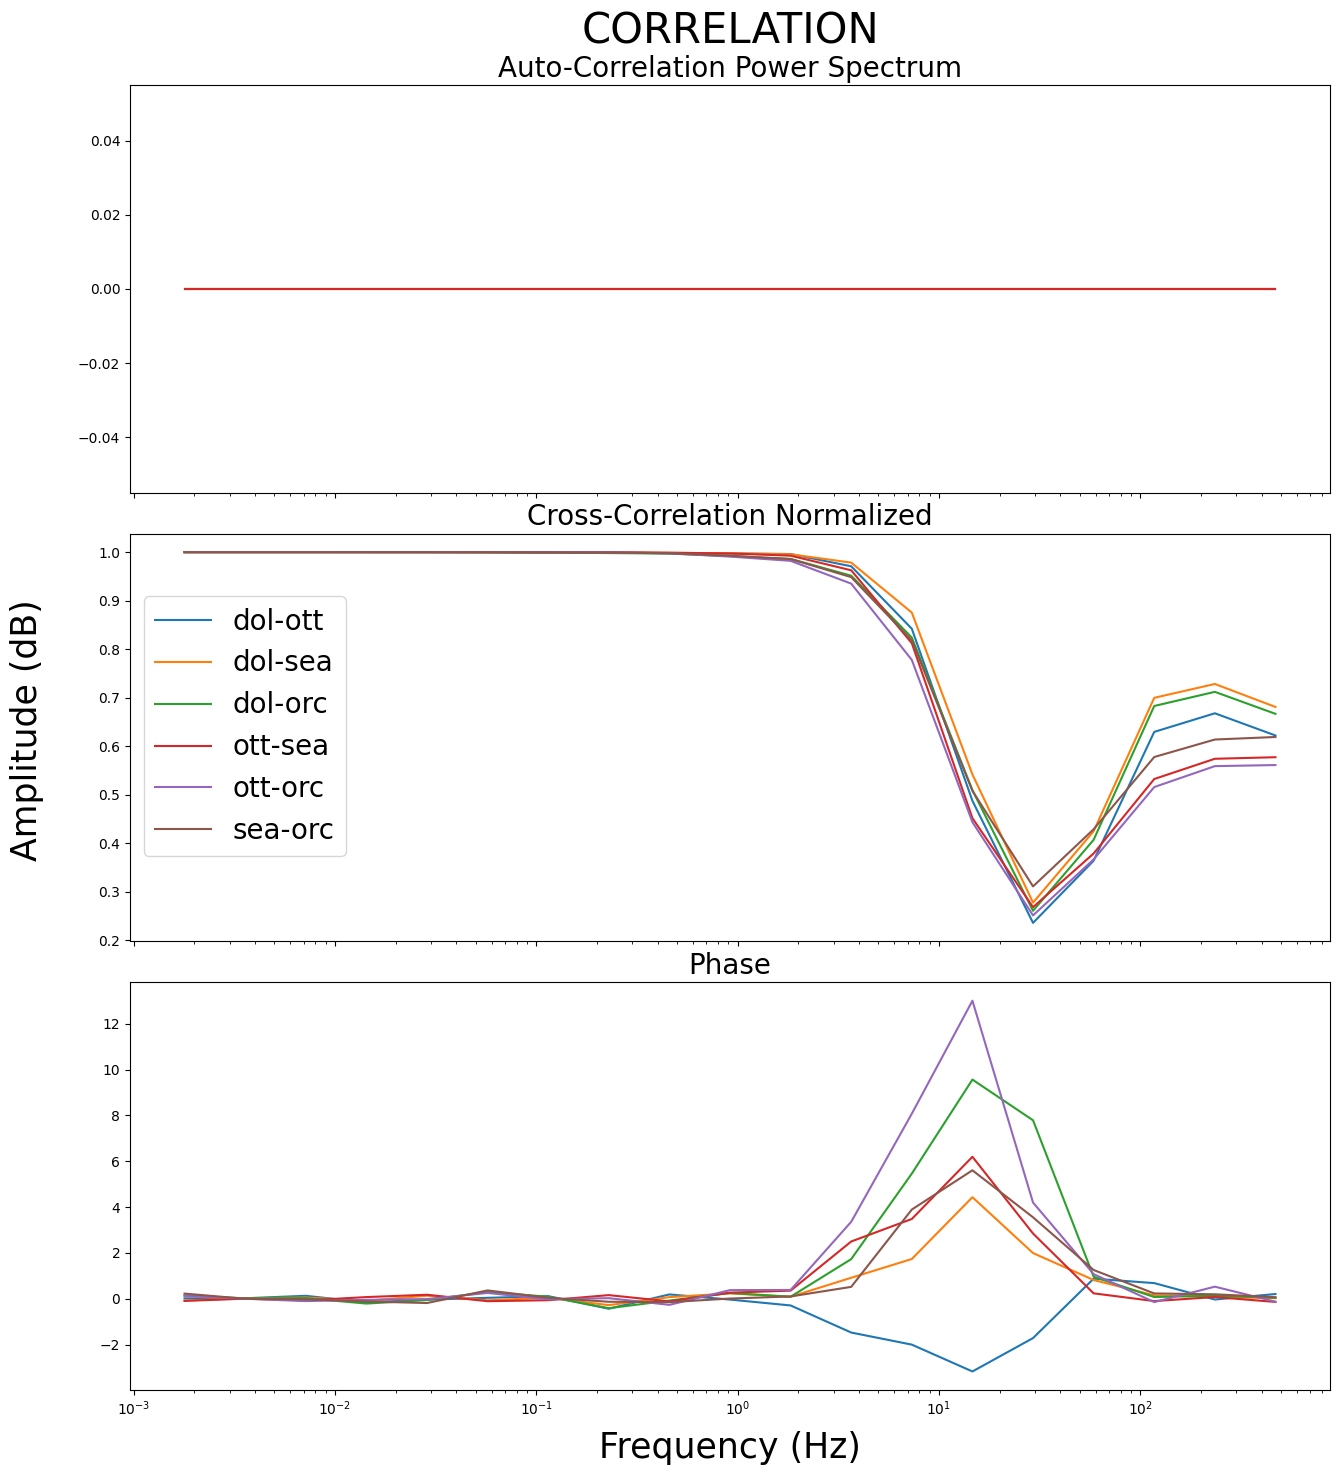

In [6]:
correlate_dict = Calc.correlate(barometer_response)
Plot.correlation(correlate_dict)